# Tarea 1 
## Análisis de Datos: Cuando hubo más gente en cuarentena desde marzo del 2020 por región?

#### Felipe Covarrubias Quintana
12-10-2021

#### Enunciado
Su tarea es mostrar y explicar, en 16 gráficos (uno por región), como fue la evolución de la cuarentena (por día) y contestar las siguientes 2 preguntas: 
1) ¿Qué dia hubo la mayor cantidad de personas en cuarentena en cada región?
2) ¿Qué día hubo la mayor cantidad de personas en cuarentena en el país?

#### Desarrollo
Para desarrollar las preguntas, es necesario importar las siguientes librerias

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

Obteniendo los datos desde el github del gobierno, el primero con los datos de las cuarentenas y el segundo con los datos de poblaciones por comuna y región. Necesarios para repsonder las preguntas

In [177]:
df = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto29/Cuarentenas-Historicas.csv', 
                 sep = ',')

In [178]:
dfp = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv', sep=',')

Elimino las columnas del dataset que no me sirven

In [179]:
df4 = df.drop(['Superficie en m2', 'Perímetro en m', 'Detalle'], axis = 1) #Me empecé a confundir entre tantos "df" distintos
# a partir de esta celda, les asigne un número a cada "df" y estos números no son secuenciales entre sí (para evitar confusiones)

Creo un nuevo dataset, por decirlo así, acortando solo a las columnas que necesito para trabajar con el codigo de abajo

In [180]:
dfp2 = dfp[['Region','Codigo region','Comuna','Codigo comuna','Poblacion']]

Botamos los valores nulos, para que no sean una molestia más adelante

In [181]:
dfp3= dfp2.dropna()

Cambio el nombre de la columna que tienen el codigo de comuna, para poder mezclar ambos dataset y tener solo uno

In [182]:
df5 = df4.rename(columns={'Código CUT Comuna': 'Codigo comuna'})

A continuación, mezclo ambos dataset con el objetivo de tener todos los datos necesarios en uno solo (Cuarentenas y poblaciones)

In [183]:
df6 = df5.merge(dfp3, on= 'Codigo comuna')

Elimino las columnas que no sirven con el siguiente código

In [184]:
df7 = df6.drop(['ID', 'Nombre', 'Estado', 'Alcance'], axis = 1)

Elimino la hora de las fechas y cambio el formato de las fechas para poder trabajar con ellas

In [185]:
df7["Fecha de Inicio"]=df7["Fecha de Inicio"].apply(lambda x:x.split(" ")[0])
df7["Fecha de Término"]=df7["Fecha de Término"].apply(lambda x: x.split(" ")[0])

In [186]:
df7["Fecha de Inicio"]=pd.to_datetime(df7["Fecha de Inicio"])
df7["Fecha de Término"]=pd.to_datetime(df7["Fecha de Término"])

Agrego una columna que contenga los datos de "Cantidad de días en cuarentena" haciendo la resta entre ambas fechas

In [187]:
df7['Cantidad de días en cuarentena'] = df7['Fecha de Término'].sub(df7['Fecha de Inicio'], axis=0)

Hasta ahora, me dí cuenta que necesito repetir los datos de cuantos días estuvo en cuarentena una región para así después poder graficarlos. Ahora las fechas están aisladas

Tengo que crear dos listas con las comunas en cuarentena y la cantidad de días que estuvieron en cuarentena. Para aplicar un código más adelante y Transformo la cantidad de días en cuarentena en número enteros para poder trabajar con ellos 

In [188]:
df7['Cantidad de días en cuarentena'] = df7['Cantidad de días en cuarentena'].dt.days.astype('int16')

In [189]:
comunas = []
for i in df7['Comuna']:
    comunas.append(i)

cuarentena = []
for i in df7['Cantidad de días en cuarentena']:
    cuarentena.append(i)

Este código lo encontré en internet, bajo la busqueda de "como repetir valores en un dataset python" y funcionó. Solo necesitaba crear un diccionario con el dato que queria repetir y la cantidad de veces. Por eso, necesitaba crear las listas anteriores

In [190]:
dict_lista = dict(zip(comunas, cuarentena))
reps = [dict_lista[val] if val in dict_lista else 1 for val in df7['Comuna']]
df9 = df7.loc[np.repeat(df7.index.values, reps)]

Hasta ahora, logré tener un dataframe llamado "df9" donde tengo todos los datos de las cuarentenas, la cantidad de días que estuvieron en cuarentena y la población de gente que estuvo en cuarentena. Ahora voy a separar este enorme dataframe por región con el objetivo de poder agregar las fechas entre los datos. 

In [191]:
r1 = df9.where(df9['Codigo region']==1)
r2 = df9.where(df9['Codigo region']==2)
r3 = df9.where(df9['Codigo region']==3)
r4 = df9.where(df9['Codigo region']==4)
r5 = df9.where(df9['Codigo region']==5)
r6 = df9.where(df9['Codigo region']==6)
r7 = df9.where(df9['Codigo region']==7)
r8 = df9.where(df9['Codigo region']==8)
r9 = df9.where(df9['Codigo region']==9)
r10 = df9.where(df9['Codigo region']==10)
r11 = df9.where(df9['Codigo region']==11)
r12 = df9.where(df9['Codigo region']==12)
r13 = df9.where(df9['Codigo region']==13)
r14 = df9.where(df9['Codigo region']==14)
r15 = df9.where(df9['Codigo region']==15)
r16 = df9.where(df9['Codigo region']==16)

Le borro los nulos a todos los dataframe creados

In [192]:
r1 = r1.dropna()
r2 = r2.dropna()
r3 = r3.dropna()
r4 = r4.dropna()
r5 = r5.dropna()
r6 = r6.dropna()
r7 = r7.dropna()
r8 = r8.dropna()
r9 = r9.dropna()
r10 = r10.dropna()
r11 = r11.dropna()
r12 = r12.dropna()
r13 = r13.dropna()
r14 = r14.dropna()
r15 = r15.dropna()
r16 = r15.dropna()

A modo de ejemplo, tengo el dataset df9 donde la región de Arica y Parinacota estuvo 29 días en cuarentena. Y gracias al codigo que utilicé más arriba, tengo el mismo dato repetido 29 veces. Ahora me falta poder ingresar las fechas que existen entremedio de la fecha de inicio y la fecha de termino.

In [193]:
df9.head() 

,Fecha de Inicio,Fecha de Término,Codigo comuna,Region,Codigo region,Comuna,Poblacion,Cantidad de días en cuarentena
0,2020-04-16,2020-05-15,15101,Arica y Parinacota,15,Arica,247552.0,29
0,2020-04-16,2020-05-15,15101,Arica y Parinacota,15,Arica,247552.0,29
0,2020-04-16,2020-05-15,15101,Arica y Parinacota,15,Arica,247552.0,29
0,2020-04-16,2020-05-15,15101,Arica y Parinacota,15,Arica,247552.0,29
0,2020-04-16,2020-05-15,15101,Arica y Parinacota,15,Arica,247552.0,29


Buscando en internet, encontré este codigo que crea una lista con fechas entremedio de dos rangos. Y posteriormente puedo agregar esas listas como una columna nueva al dataframe

In [194]:
inicio2 = datetime(2020,5,5)
fin2    = datetime(2020,5,28)

lista_fechas_r2 = [(inicio2 + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin2 - inicio2).days + 1)] 
lista_fechas_r22 = [(inicio2 + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin2 - inicio2).days + 1)] 
lista2 = lista_fechas_r2 + lista_fechas_r22

In [195]:
print(len(r2), len(lista2))

48 48


In [196]:
r2.insert(0,"Fecha",lista2,True)

In [197]:
r2_1 = r2.drop(['Fecha de Inicio', 'Fecha de Término', 'Cantidad de días en cuarentena'], axis = 1)

Finalmente, pude obtener un dataframe de la región de Antofagasta, el cual tiene la gente que estuvo en cuarentena (Antofagasta y mejillones) con las fechas entremedio de cada cuarentena. Por ejemplo, el segúndo dato tiene como fecha 2020-05-06 y así


In [198]:
r2_1.head()

,Fecha,Codigo comuna,Region,Codigo region,Comuna,Poblacion
35,2020-05-05,2101.0,Antofagasta,2.0,Antofagasta,425725.0
35,2020-05-06,2101.0,Antofagasta,2.0,Antofagasta,425725.0
35,2020-05-07,2101.0,Antofagasta,2.0,Antofagasta,425725.0
35,2020-05-08,2101.0,Antofagasta,2.0,Antofagasta,425725.0
35,2020-05-09,2101.0,Antofagasta,2.0,Antofagasta,425725.0


Continuo haciendo el mismo procedimiento para las demás regiones. Cabe destacar que no todas las regiones tienen datos, no sé por qué

In [199]:
inicio51 = datetime(2020,3,19)
fin51    = datetime(2020,4,5)

inicio52 = datetime(2020,6,9)
fin52    = datetime(2020,7,27)

inicio53 = datetime(2020,6,19)
fin53    = datetime(2020,7,27)

lista_fechas_r51 = [(inicio51 + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin51 - inicio51).days + 1)] 
lista_fechas_r52 = [(inicio52 + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin52 - inicio52).days + 1)] 
lista_fechas_r53 = [(inicio53 + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin53 - inicio53).days + 1)] 

lista5 = lista_fechas_r51 + lista_fechas_r52 + lista_fechas_r53

In [200]:
print(len(r5), len(lista5))

106 106


In [201]:
r5.insert(0,"Fecha",lista5,True)
r5_1 = r5.drop(['Fecha de Inicio', 'Fecha de Término', 'Cantidad de días en cuarentena'], axis = 1)

In [202]:
r5_1.head()

,Fecha,Codigo comuna,Region,Codigo region,Comuna,Poblacion
26,2020-03-19,5201.0,Valparaíso,5.0,Isla de Pascua,8277.0
26,2020-03-20,5201.0,Valparaíso,5.0,Isla de Pascua,8277.0
26,2020-03-21,5201.0,Valparaíso,5.0,Isla de Pascua,8277.0
26,2020-03-22,5201.0,Valparaíso,5.0,Isla de Pascua,8277.0
26,2020-03-23,5201.0,Valparaíso,5.0,Isla de Pascua,8277.0


Hasta acá, luego de comentarlo con compañeros del curso. Pudimos pensar un código por medio de un ciclo "for" que pueda iterar para ir guardando las listas necesarias para agregar los rangos de fechas a los distintos datasets. El código resultó lo siguiente

In [203]:
#primero creamos dos listas guardando la fecha de inicio y la fecha de término
Inicio=[]
for i in df7["Fecha de Inicio"]:
    Inicio.append(i)

Final=[]
for j in df7["Fecha de Término"]:
    Final.append(j)
#luego creamos un ciclo for que pueda iterar entre la resta de la fecha de inicio y término, resultando una lista de listas
m=[]
for k,l in zip(Inicio,Final):

    inicio = k
    fin    = l

    m.append([(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                            for d in range((fin - inicio).days )])
len(m)
#Finalmente la lista "m" contiene todos los rangos de fechas necesarios para agregar en las distintas regiones y finalmente poder graficar

44

In [204]:
l8= m[21]+m[22]
r8.insert(0,"Fecha",l8,True)
r8_1 = r8.drop(['Fecha de Inicio', 'Fecha de Término', 'Cantidad de días en cuarentena'], axis = 1)

In [205]:
print(len(r8), len(l8))

34 34


In [206]:
l9= m[10]+m[23]+m[25]+m[31]+m[32]+m[40]
r9.insert(0,"Fecha",l9,True)
r9_1 = r9.drop(['Fecha de Inicio', 'Fecha de Término', 'Cantidad de días en cuarentena'], axis = 1)

In [207]:
l10= m[8]
r10.insert(0,"Fecha",l10,True)
r10_1 = r9.drop(['Fecha de Inicio', 'Fecha de Término', 'Cantidad de días en cuarentena'], axis = 1)

In [208]:
l11= m[30]
r11.insert(0,"Fecha",l11,True)
r11_1 = r11.drop(['Fecha de Inicio', 'Fecha de Término', 'Cantidad de días en cuarentena'], axis = 1)

In [209]:
l12= m[9]+m[29]
r12.insert(0,"Fecha",l12,True)
r12_1 = r12.drop(['Fecha de Inicio', 'Fecha de Término', 'Cantidad de días en cuarentena'], axis = 1)

In [210]:
r13

,Fecha de Inicio,Fecha de Término,Codigo comuna,Region,Codigo region,Comuna,Poblacion,Cantidad de días en cuarentena
1,2020-04-13,2020-05-05,13101.0,Metropolitana,13.0,Santiago,503147.0,22.0
1,2020-04-13,2020-05-05,13101.0,Metropolitana,13.0,Santiago,503147.0,22.0
1,2020-04-13,2020-05-05,13101.0,Metropolitana,13.0,Santiago,503147.0,22.0
1,2020-04-13,2020-05-05,13101.0,Metropolitana,13.0,Santiago,503147.0,22.0
1,2020-04-13,2020-05-05,13101.0,Metropolitana,13.0,Santiago,503147.0,22.0
...,...,...,...,...,...,...,...,...
42,2020-06-12,2020-07-28,13303.0,Metropolitana,13.0,Tiltil,21477.0,46.0
42,2020-06-12,2020-07-28,13303.0,Metropolitana,13.0,Tiltil,21477.0,46.0
42,2020-06-12,2020-07-28,13303.0,Metropolitana,13.0,Tiltil,21477.0,46.0
42,2020-06-12,2020-07-28,13303.0,Metropolitana,13.0,Tiltil,21477.0,46.0


In [211]:
l13 = m[1]+m[2]+m[3]+m[4]+m[5]+m[6]+m[11]+m[12]+m[13]+m[14]+m[15]+m[16]+m[17]+m[18]+m[19]+m[20]+m[27]+m[28]+m[33]+m[34]+m[37]+m[38]+m[39]+m[42]

In [212]:
print(len(r13), len(l13))

982 752


In [213]:
l15= m[0]
r15.insert(0,"Fecha",l15,True)
r15_1 = r15.drop(['Fecha de Inicio', 'Fecha de Término', 'Cantidad de días en cuarentena'], axis = 1)

In [214]:
l16= m[0]
r16.insert(0,"Fecha",l16,True)
r16_1 = r16.drop(['Fecha de Inicio', 'Fecha de Término', 'Cantidad de días en cuarentena'], axis = 1)

In [215]:
regiones=pd.concat([r2_1,r5_1,r8_1,r9_1,r10_1,r11_1,r12_1,r15_1,r16_1])

Finalmente obtengo un dataframe que tiene todas las cuarentenas, todas las fechas y todas las personas

In [216]:
regiones

,Fecha,Codigo comuna,Region,Codigo region,Comuna,Poblacion
35,2020-05-05,2101.0,Antofagasta,2.0,Antofagasta,425725.0
35,2020-05-06,2101.0,Antofagasta,2.0,Antofagasta,425725.0
35,2020-05-07,2101.0,Antofagasta,2.0,Antofagasta,425725.0
35,2020-05-08,2101.0,Antofagasta,2.0,Antofagasta,425725.0
35,2020-05-09,2101.0,Antofagasta,2.0,Antofagasta,425725.0
...,...,...,...,...,...,...
0,2020-05-10,15101.0,Arica y Parinacota,15.0,Arica,247552.0
0,2020-05-11,15101.0,Arica y Parinacota,15.0,Arica,247552.0
0,2020-05-12,15101.0,Arica y Parinacota,15.0,Arica,247552.0
0,2020-05-13,15101.0,Arica y Parinacota,15.0,Arica,247552.0


In [230]:
regiones1 = regiones.groupby(["Codigo region","Fecha"]).sum()

In [231]:
regiones1

Codigo comuna  Poblacion
Codigo region Fecha                               
2.0           2020-05-05         4203.0   440501.0
              2020-05-06         4203.0   440501.0
              2020-05-07         4203.0   440501.0
              2020-05-08         4203.0   440501.0
              2020-05-09         4203.0   440501.0
...                                 ...        ...
15.0          2020-05-10        30202.0   495104.0
              2020-05-11        30202.0   495104.0
              2020-05-12        30202.0   495104.0
              2020-05-13        30202.0   495104.0
              2020-05-14        30202.0   495104.0

[261 rows x 2 columns]

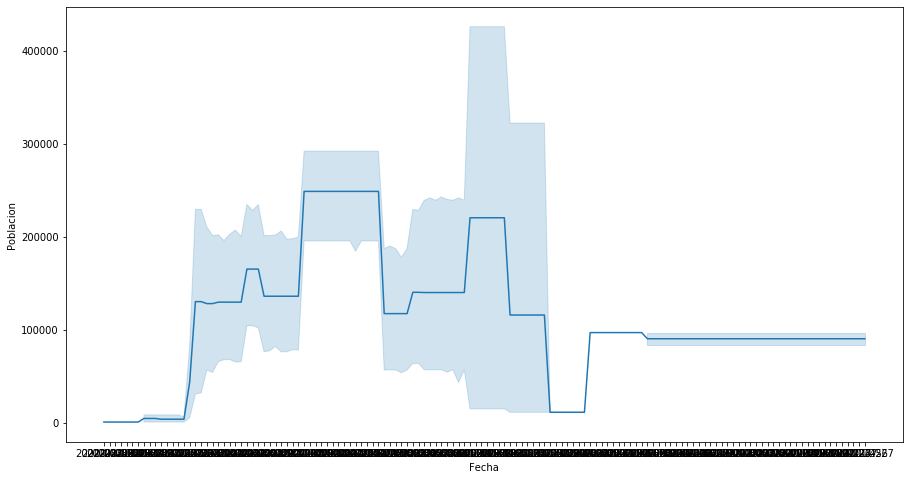

In [234]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Fecha', y = 'Poblacion', data = regiones)